## NLTK Corpus
### 1. tabulate, plot 

In [2]:
import nltk
# nltk.download() : 선택할 수 있음. 깔끔한 출력형식 참고
nltk.download(['inaugural', 'brown']) 

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
brown = nltk.corpus.brown

In [4]:
cfd1 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
    
)

genres = brown.categories()[:5]
modals = ['can', 'could', 'will', 'would', 'may', 'might']
cfd1.tabulate(conditions=genres, samples=modals)

                 can could  will would   may might 
     adventure    46   151    50   191     5    58 
belles_lettres   246   213   236   392   207   113 
     editorial   121    56   233   180    74    39 
       fiction    37   166    52   287     8    44 
    government   117    38   244   120   153    13 


In [6]:
# genre별로 modal의 빈도수를 가진 cfd
cfd2 = nltk.ConditionalFreqDist(
    (genre, modals)
    for genre in brown.categories()
    for modals in ['can', 'could', 'will', 'would']
    
    for word in brown.words(categories=genre)
        if word.lower() == modals # candidate
)
cfd2.tabulate()

                  can could  will would 
      adventure    48   154    51   194 
 belles_lettres   249   216   246   397 
      editorial   124    57   235   185 
        fiction    39   168    56   291 
     government   119    38   244   120 
        hobbies   276    59   269    83 
          humor    17    33    13    56 
        learned   367   159   340   321 
           lore   170   142   178   188 
        mystery    45   145    25   189 
           news    94    87   389   246 
       religion    84    59    72    69 
        reviews    45    40    61    48 
        romance    79   195    49   247 
science_fiction    16    49    17    80 


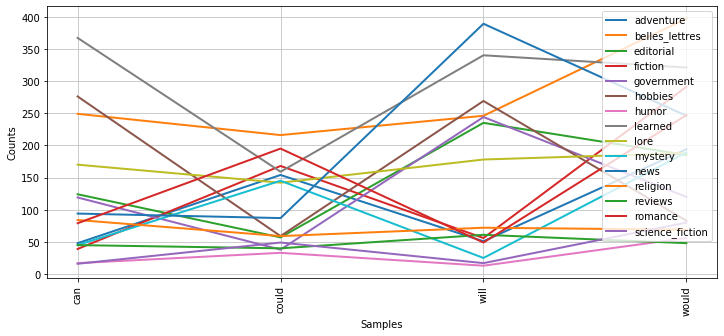

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
cfd2.plot()

### 2. Inaugural
- 연설문 데이터

In [10]:
inaugural = nltk.corpus.inaugural

In [11]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [12]:
# inaugural에서 america, citizen의 빈도수, 연도별로
cfd3 = nltk.ConditionalFreqDist(
    #(genre, modals) # modals, genre
    #(target_word, fileid[:-4])
    (fileid[:-4], target_word)
    
    #for genre in brown.categories()
    for fileid in inaugural.fileids()
    
    #for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    for target_word in ['america', 'citizen']
   
    #for word in brown.words(categories=genre)
    for word in inaugural.words(fileids=fileid)
        #if word.lower() == modals # candidate
        if word.lower().startswith(target_word)
)

tab = cfd3.tabulate()

                america citizen 
1789-Washington       2       5 
1793-Washington       1       1 
     1797-Adams       8       6 
 1801-Jefferson       0       7 
 1805-Jefferson       1      10 
   1809-Madison       0       1 
   1813-Madison       1       4 
    1817-Monroe       1      14 
    1821-Monroe       2      15 
     1825-Adams       0       3 
   1829-Jackson       0       2 
   1833-Jackson       2       3 
  1837-VanBuren       2       7 
  1841-Harrison       7      38 
      1845-Polk       0      11 
    1849-Taylor       2       2 
    1853-Pierce       2       4 
  1857-Buchanan       3       7 
   1861-Lincoln       2       7 
   1865-Lincoln       1       0 
     1869-Grant       0       5 
     1873-Grant       0       3 
     1877-Hayes       1       9 
  1881-Garfield       2       9 
 1885-Cleveland       4      13 
  1889-Harrison       6      12 
 1893-Cleveland       9      10 
  1897-McKinley       9      10 
  1901-McKinley       7       2 
 1905-Roos

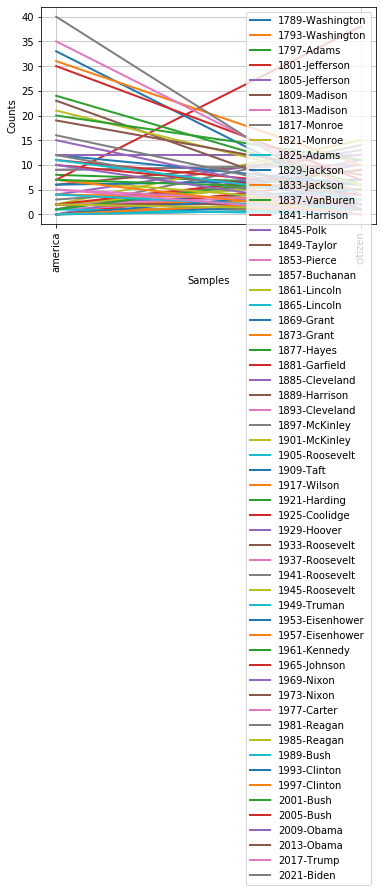

In [33]:
cfd3.plot()

## Ch07. Tuple & List
### 7-1. Tuple 
#### 1) 생성하기

In [34]:
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

1.1) 요소가 2개 이상일 때

In [35]:
listA = ['a', 'b']

tupleA = 'a', 'b' # 더 많이 씀
tupleA = ('a', 'b')

tupleA, listA

(('a', 'b'), ['a', 'b'])

1.2) 요소가 1개일 때

In [36]:
listA = ['a']

tupleA = ('a',) # comma
tupleA = 'a', # comma 안붙이면 str

tupleA, listA

(('a',), ['a'])

In [37]:
ex = ('a')
type(ex)

str

#### 2) 여러 변수 할당하기
- packing: 한 변수에 여러 개의 데이터를 할당하는 것
    - 리스트, 튜플 자체가 a = [1, 2, 3, 4]
- unpacking: 여러 변수에 하나의 데이터를 할당하는 것. 그것을 각각의 변수로 변환하는 것
    - a, b, c = [1, 2, 3]

In [39]:
name = 'lee'
a, b, c = name
a, b, c # unpacking, tuple로 출력

('l', 'e', 'e')

In [41]:
# 값 교환(튜플의 장점)
pwd = 'abcd'
userId = 'hello'

# pwd = 'hello', userId = 'abcd'
temp1 = pwd
temp2 = userId
pwd = temp2
userId = temp1

pwd, userId = userId, pwd
pwd, userId

#### 3) 연산
- 리스트도 동일함

In [42]:
('a', ) + ('b', 'c')

('a', 'b', 'c')

In [43]:
('a', 'b') * 4

('a', 'b', 'a', 'b', 'a', 'b', 'a', 'b')

In [44]:
a = 1, 2
b = 1, 3

a < b # 첫번째 요소부터 차례로 크기 비교

True

#### 4) 순회하기

In [45]:
# tuple도 list처럼 loop 탈 수 있음
a = 1, 2, 3, 4, 5

for i in a:
    print(a)

(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)


#### 5) list comprehension
- tuple? (x)

In [49]:
#1. tuple로 감싼다.
tuple([word for word in a])

#2. 느림. 비추. (1, 2, list comprehension 중 list comprehension이 가장 빠름)
*[word for word in a],

(1, 2, 3, 4, 5)

#### 6) 튜플은 불변 객체이다. 
- a = 1, 2, 3, 4
- (첨가 안됨)
- 다른 개발자가 코드 수정할 때 튜플 수정할 수 없게 하는 용도로 사용함. 
- key 값을 저장

blue = 1
white = 2
...

- 메모리 사용이 적다

In [52]:
# 튜플 간 덧셈은 수정된게 아니라 다른 튜플을 생성한 것.
a = (1,)
b = (1, 2, 3)
id(a), id(a + b)

(1823027651272, 1823027253640)

#### 7) 형 변환
- tuple()
- ()

In [55]:
tuple('cat'), ['cat']

(('c', 'a', 't'), ['cat'])

In [56]:
list('cat'), ['cat']

(['c', 'a', 't'], ['cat'])

In [57]:
b[0]

1

### 7-2-2. 리스트 컴프리핸션

In [80]:
ex = [(nal, day) for nal, day in zip(a, b)]
ex

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

#### 연습
- 리스트 -> for문으로
- for문을 사용하여 ex를 구현하기 
    - a, b

In [88]:
result = []
for nal, day in zip(a, b):
    result.append((nal, day))
result

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [90]:
# for nal in a
    # for day in b
[(nal, day) for nal in a for day in b] 

[(1, 'mon'),
 (1, 'tue'),
 (1, 'wed'),
 (1, 'thu'),
 (2, 'mon'),
 (2, 'tue'),
 (2, 'wed'),
 (2, 'thu'),
 (3, 'mon'),
 (3, 'tue'),
 (3, 'wed'),
 (3, 'thu')]

#### Quiz

In [91]:
# 문제1
sentence = "don't judge a book by its cover"
# (대문자, 타이틀, 글자수)로 저장된 리스트로 만들어라
#[('DON\'T',  'Don\'t', 3), (...)]

In [95]:
[(word.upper(), word.title(), len(word)) for word in sentence.split()]

[("DON'T", "Don'T", 5),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [99]:
# 문제2
text = [
    ['hello', 'guys'],
    ['how', 'are', 'you']
]

#2.1. 문장으로 구성된 리스트로 만들기
    # ['hello guys', 'how are you']
#2.2. 전체 단어를 하나의 리스트로 가져오기
    # ['', '', '', '', '']
#2.3. 전체를 스트링으로 가져오기
    # 'hello guys how are you'

In [107]:
sents = [' '.join(lists) for lists in text]

['hello guys', 'how are you']

In [ ]:
#1.
[' '.join(sent) for sent in text] # ['', '']

In [114]:
for sent in text:
    for word in sent:
        print(word)

hello
guys
how
are
you


In [115]:
#2
[word for sent in text for word in sent]

['hello', 'guys', 'how', 'are', 'you']

In [106]:
' '.join([word for sent in text for word in sent])

'hello guys how are you'

### Quiz
브라운코퍼스에서 romance 장르 raw 앞에서 5000개 선택
- 문장 분절 있는 토큰 리스트로 만들기
- 리스트 컴프리핸션, 포문 사용해서 불필요한 것들 제거하기
    - 문장부호 모두 제거 

In [15]:
# quiz
brown.raw(categories='romance')[:5000] # => list of words, sentence split 남긴 형태로

import string

from nltk.corpus import *
brown = nltk.corpus.brown
romance = brown.raw(categories='romance')

# 1. 단어로 분절한 후, 문장으로 분절하기
words = romance.split() # 단어로 분절
sents = []
sent = []
for i in range(len(words)):
    sent.append(words[i])
    if words[i] in ['!/!', "''/''", '--/--', './.', ':/:', ';/;', '?/?', ')/)']:# 문장 끝 부호로 문장 분절
        sents.append(sent)
        sent = []

# 2. 불필요한 요소 제거하기(ㄱ. 문장부호 제거하기 / ㄴ. POS tag 제거하기)
punc = string.punctuation
output = [[word.split('/')[0] for word in sent if (word.split('/')[0] not in punc) and (word.split('/')[0] not in ["''", '--', '``'])] for sent in sents]        

# 3. 불필요한 요소 제거하기(ㄷ. 하이픈으로 이어진 단어들 / ㄹ. apostrophe)
for sent in output:
    for word in sent:
        if '-' in word: # 하이픈
            sent[sent.index(word):sent.index(word)+1] = word.split('-')
        elif (word.startswith('\'') == 0) and ('\'' in word): # apostrophe
            sent[sent.index(word):sent.index(word)+1] = [word[:word.index('\'')], word[word.index('\''):]]

print(output[:10])

[['They', 'neither', 'liked', 'nor', 'disliked', 'the', 'Old', 'Man'], ['To', 'them', 'he', 'could', 'have', 'been', 'the', 'broken', 'bell', 'in', 'the', 'church', 'tower', 'which', 'rang', 'before', 'and', 'after', 'Mass', 'and', 'at', 'noon', 'and', 'at', 'six', 'each', 'evening'], ['its', 'tone', 'repetitive', 'monotonous', 'never', 'breaking', 'the', 'boredom', 'of', 'the', 'streets'], ['The', 'Old', 'Man', 'was', 'unimportant'], ['Yet', 'if', 'he', 'were', 'not', 'there', 'they', 'would', 'have', 'missed', 'him', 'as', 'they', 'would', 'have', 'missed', 'the', 'sounds', 'of', 'bees', 'buzzing', 'against', 'the', 'screen', 'door', 'in', 'early', 'June', 'or', 'the', 'smell', 'of', 'thick', 'tomato', 'paste'], ['the', 'ripe', 'smell', 'that', 'was', 'both', 'sweet', 'and', 'sour'], ['rising', 'up', 'from', 'aluminum', 'trays', 'wrapped', 'in', 'fly', 'dotted', 'cheesecloth'], ['Or', 'the', 'surging', 'whirling', 'sounds', 'of', 'bats', 'at', 'night', 'when', 'their', 'black', 'bodi